# Sprawozdanie
autor: Piotr Wojtyś

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def f0(x):
    return 2 * x ** 2 + 1 - 2 ** x

def df0(x):
    return 4 * x - 2**x * np.log(2)

In [3]:
def scant_method(a,b,eps):
    x1=a
    x2=b
    while np.abs(f0(x2)) > eps:
        xn = x2 - (x2 - x1)/(f0(x2) - f0(x1))*f0(x2)
        x1=x2
        x2=xn
        
    
    return x2

## Wizualizacja przebiegu funkcji

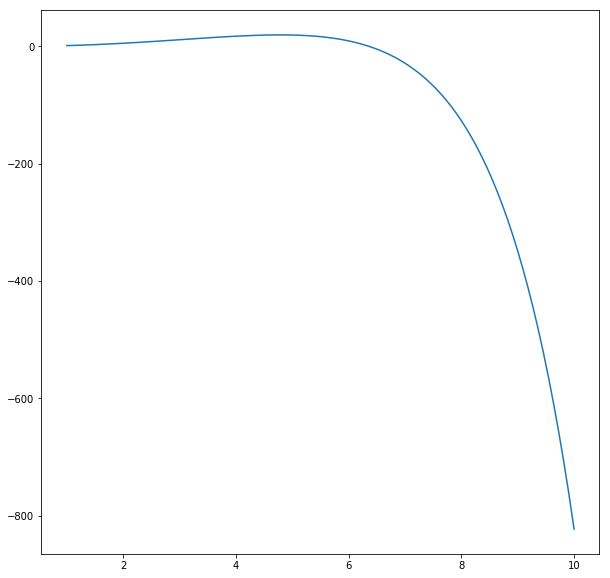

In [4]:
x = np.linspace(1,10,100)
plt.figure(figsize=(10,10))
plt.plot(x,f0(x))
plt.show()

In [5]:
def newton_1d(a,b,eps):
    xn =  b
    while np.abs(f0(xn)) > eps:
        xn = xn - f0(xn)/(df0(xn))
    return xn

In [6]:
newton_result = newton_1d(-1,10,1e-14)
print(newton_result)

6.3523448924341155


In [7]:
f0(newton_result)

0.0

In [8]:
newton_result = newton_1d(1,10,1e-14)
print(newton_result)

6.3523448924341155


In [9]:
f0(newton_result)

0.0

In [10]:
scant_result = scant_method(-1,10,1e-14)
print(scant_result)

-4.0470663985053456e-17


In [11]:
f0(scant_result)

0.0

In [12]:
scant_result = scant_method(1,10,1e-14)
print(scant_result)

0.39928075666163754


In [13]:
f0(scant_result)

0.0

## Wnioski
Metody znajdują miejsca zerowe lecz zaczynają z różnej strony.

In [14]:
def f1(x1,x2,x3):
    return x1**2 +x2**2 + x3**2 - 1

def df11(x1,x2,x3):
    return 2 * x1

def df12(x1,x2,x3):
    return 2 * x2

def df13(x1,x2,x3):
    return 2 * x3

df1 = np.array([df11,df12,df13])

In [15]:
def f2(x1,x2,x3):
    return 2*x1**2 + x2**2 - 4*x3

def df21(x1,x2,x3):
    return 4 * x1

def df22(x1,x2,x3):
    return 2 * x2

def df23(x1,x2,x3):
    return -4

df2 = np.array([df21,df22,df23])

In [16]:
def f3(x1,x2,x3):
    return 3 * x1**2 - 4 * x2 + x3**2

def df31(x1,x2,x3):
    return 6 * x1

def df32(x1,x2,x3):
    return -4

def df33(x1,x2,x3):
    return 2 * x3

df3 = np.array([df31,df32,df33])

## Parametry
df - macierz Jacobiego  
f - macierz funkcji

In [17]:
df = np.array([df1,df2,df3])
f = np.array([f1,f2,f3])

In [18]:
def newton_raphson_method(f,df,x0,eps):
    xn = np.array(x0)
    Mf = np.array([fn(*xn) for fn in f ])
    for i in range(200):
        Mf = np.array([fn(*xn) for fn in f ])
        Mdf = np.array([fn(*xn) for fn in df.reshape((-1))]).reshape(df.shape)
        d = np.linalg.solve(Mdf,-Mf)
        xn = xn + d
        if np.sum(Mf**2) <= eps:
            break
    return xn

In [19]:
newton_raphson_method(f,df,(0,0,0),1e-10)

LinAlgError: Singular matrix

## Tak miało być
Metoda  Newrona-Raphson'a jest podatana na wybór miejsca startowego. Dla punktu (0,0,0) jakobian jest równy 0 zatem wybraliśmy fatany punkt startowy

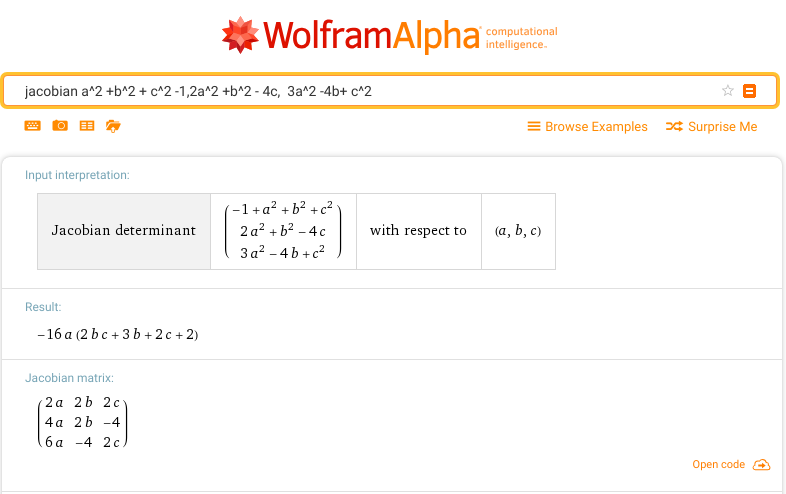

## Inny punkt startowy
Tym razem wybieram punkt startowy (1,1,1)

In [20]:
result = newton_raphson_method(f,df,(1,1,1),1e-10)
result

array([0.78519693, 0.49661139, 0.36992283])

In [21]:
e1 = f1(*result)
e1

4.440892098500626e-16

In [22]:
e2 = f2(*result)
e2

6.661338147750939e-16

In [23]:
e3 = f3(*result)
e3

9.43689570931383e-16

In [24]:
np.sqrt(np.sum(np.asarray([e1,e2,e3])**2))

1.237537672871711e-15

## Wnioski
Nie dla każdego punktu startowego metoda Newtona-Raphson'a jest zbierzna.
Błąd jest minimalny na poziomie błędu reprezentacji

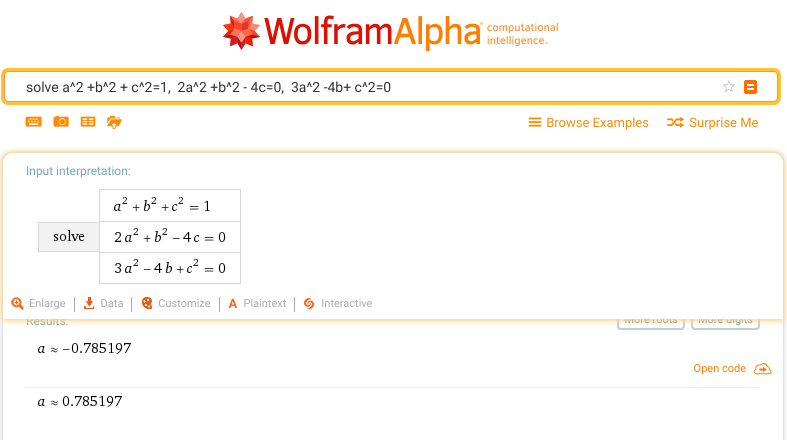